In [772]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

In [773]:
df = pd.read_csv("dataset/dataset.csv")
display(df.describe())

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3388.790323,-1845.403226,673.844086,-172.782258,65.991935,569.055108,0.709677
std,41080.736034,33636.742474,20938.796026,408.165401,491.198808,495.771564,0.454217
min,-375410.000000,-273840.000000,-100940.000000,-1206.000000,-1387.000000,-715.000000,0.000000
25%,-1050.000000,-3010.000000,-1470.000000,-596.500000,-18.000000,26.750000,0.000000
50%,770.000000,-840.000000,280.000000,12.000000,-7.000000,987.000000,1.000000
75%,3430.000000,910.000000,2100.000000,19.000000,8.250000,997.000000,1.000000
max,356440.000000,179760.000000,196560.000000,1027.000000,1025.000000,1389.000000,1.000000


## Try some ML models

In [774]:
from sklearn.model_selection import train_test_split
X = df[[col for col in df.columns if col != "label"]]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [775]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=4, scoring='f1_micro')
gnb_scores.mean()

0.8158602150537634

In [776]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_hat = gnb.predict(X_test)
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85        54
          1       0.93      0.95      0.94       132

avg / total       0.91      0.91      0.91       186



In [777]:
import pickle
pickle.dump(gnb1, open("model/nbmodel.pkl", 'wb'))

---
## Eliminate outliers

In [778]:
df_class0 = df.loc[df["label"] == 0]
display(df_class0.describe())
df_class1 = df.loc[df["label"] == 1]
display(df_class1.describe())

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0
mean,6854.814815,-5280.462963,1976.527778,-547.361111,263.500000,105.750000,0.0
std,55613.242993,48753.795671,28407.212423,248.792936,667.842489,367.620194,0.0
min,-375410.000000,-273840.000000,-100940.000000,-1206.000000,-1387.000000,-715.000000,0.0
25%,-12705.000000,-35700.000000,-8540.000000,-699.250000,-571.250000,-145.250000,0.0
50%,7420.000000,-2310.000000,1190.000000,-629.500000,679.500000,-40.500000,0.0
75%,25690.000000,26670.000000,10990.000000,-420.500000,768.500000,373.250000,0.0
max,356440.000000,179760.000000,196560.000000,380.000000,1025.000000,1389.000000,0.0


,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.0
mean,1970.871212,-440.151515,140.928030,-19.545455,-14.806818,758.589015,1.0
std,33325.810865,24872.385211,16968.598202,358.602455,368.344912,409.176796,0.0
min,-375410.000000,-273840.000000,-100940.000000,-1206.000000,-1387.000000,-715.000000,1.0
25%,-1050.000000,-2100.000000,-1050.000000,10.000000,-16.000000,471.750000,1.0
50%,770.000000,-840.000000,280.000000,15.000000,-9.000000,994.000000,1.0
75%,2100.000000,490.000000,1610.000000,20.000000,-1.000000,999.000000,1.0
max,356440.000000,179760.000000,196560.000000,1027.000000,1008.000000,1389.000000,1.0


In [779]:
def find_outlier(df, col_name):
    plt.show()
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    outliers =  (df[col_name] > (q3 + 1.5 * iqr)) | (df[col_name] < (q1 - 1.5 * iqr))
    return df[outliers]

In [780]:
def eli_outlier(df, col_name, plot=False):
    if plot:
        df[col_name].plot()
        plt.xlabel("X")
        plt.ylabel("{}".format(col_name))
        plt.title("{}".format(col_name))
        plt.show()
    outlier = find_outlier(df, col_name)
    new_df = df[~df.isin(outlier)].dropna()
    if plot:
        new_df[col_name].plot()
        plt.xlabel("X")
        plt.ylabel("{}".format(col_name))
        plt.title("After drop outliers, {}".format(col_name))
        plt.show()
    return new_df

### Class 0

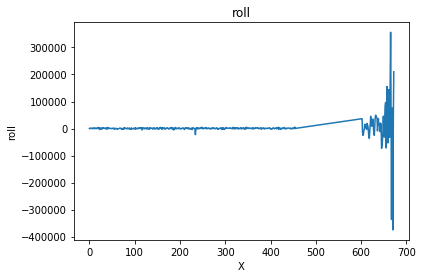

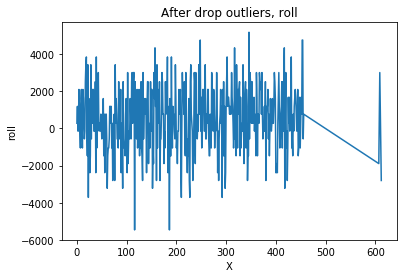

Now, there are 459 rows left


In [781]:
col = "roll"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

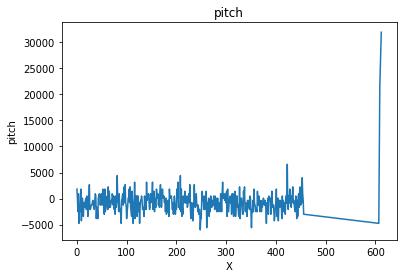

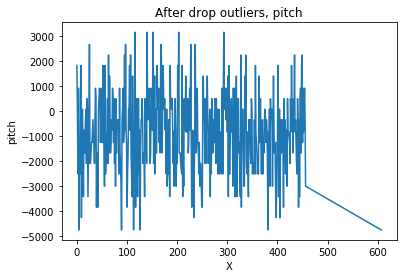

Now, there are 450 rows left


In [782]:
col = "pitch"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

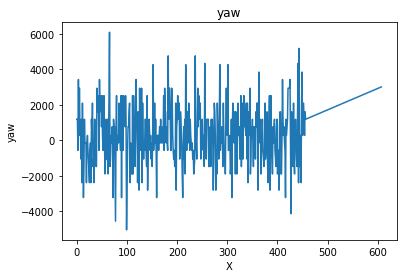

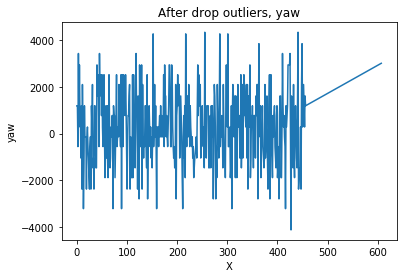

Now, there are 444 rows left


In [783]:
col = "yaw"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

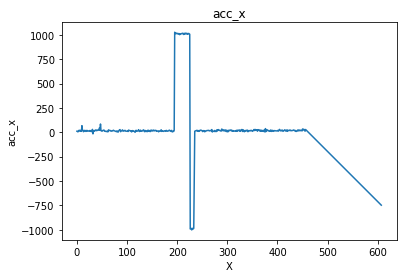

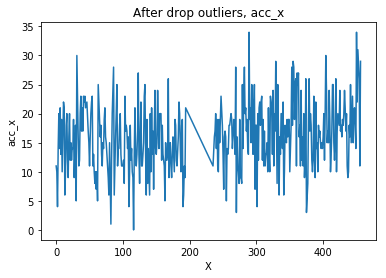

Now, there are 400 rows left


In [784]:
col = "acc_x"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

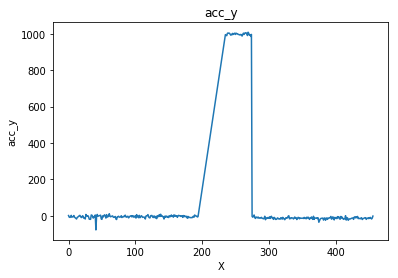

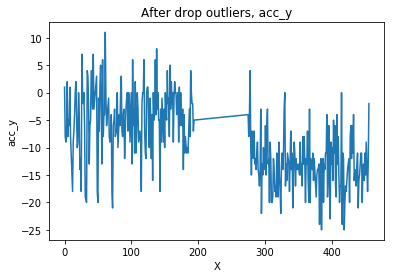

Now, there are 361 rows left


In [785]:
col = "acc_y"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

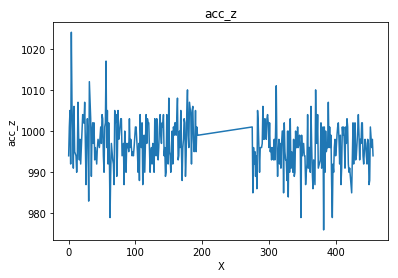

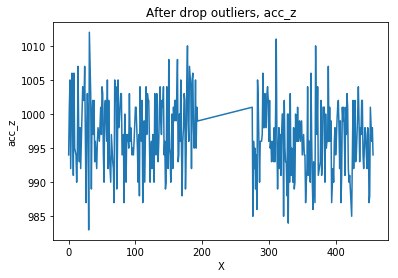

Now, there are 355 rows left


In [786]:
col = "acc_z"
df_class1 = eli_outlier(df_class1, col, plot=True)
print("Now, there are {} rows left".format(df_class1[col].count()))

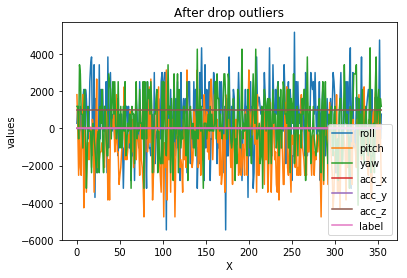

In [787]:
df_class1 = df_class1.reset_index(drop=True)
df_class1.plot()
plt.xlabel("X")
plt.ylabel("values")
plt.title("After drop outliers")
plt.show()

### Class 1

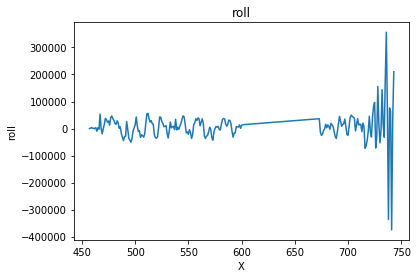

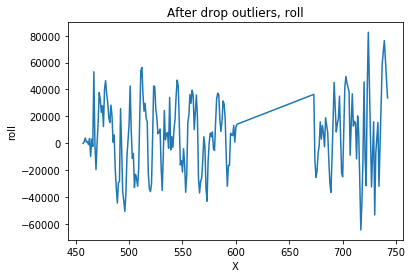

Now, there are 206 rows left


In [788]:
col = "roll"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

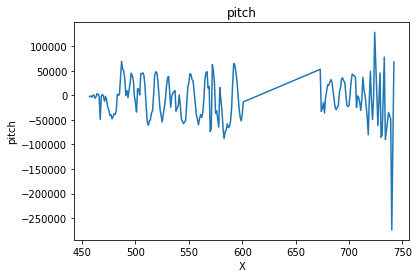

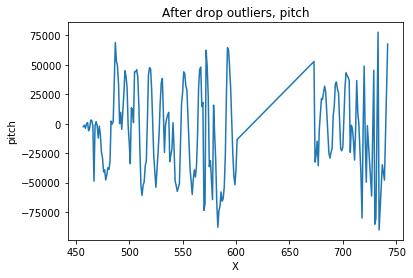

Now, there are 204 rows left


In [789]:
col = "pitch"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

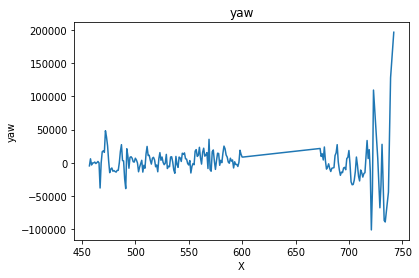

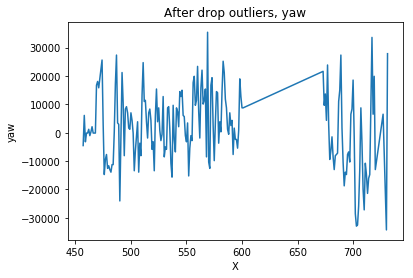

Now, there are 191 rows left


In [790]:
col = "yaw"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

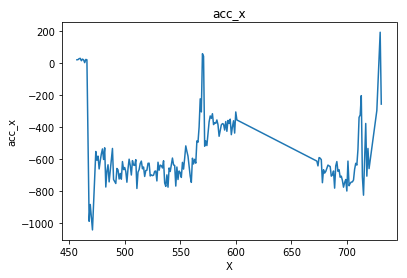

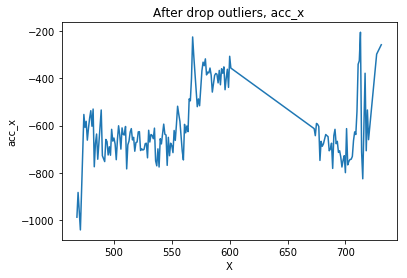

Now, there are 178 rows left


In [791]:
col = "acc_x"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

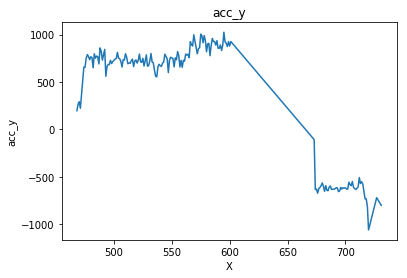

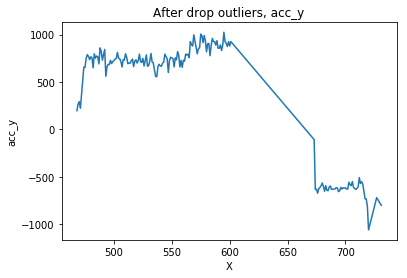

Now, there are 178 rows left


In [792]:
col = "acc_y"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

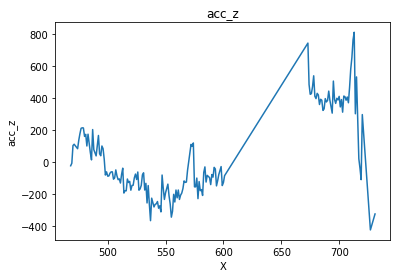

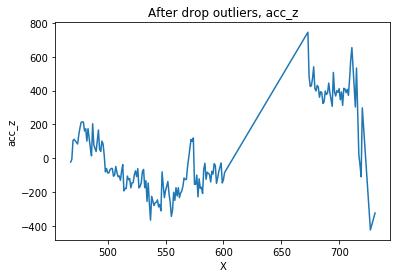

Now, there are 176 rows left


In [793]:
col = "acc_z"
df_class0 = eli_outlier(df_class0, col, plot=True)
print("Now, there are {} rows left".format(df_class0[col].count()))

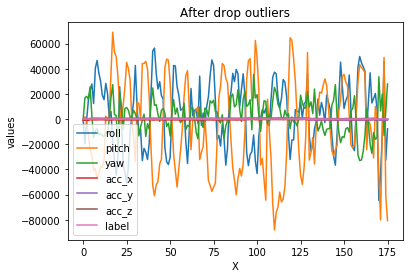

In [794]:
df_class0 = df_class0.reset_index(drop=True)
df_class0.plot()
plt.xlabel("X")
plt.ylabel("values")
plt.title("After drop outliers")
plt.show()

In [795]:
new_df = df_class0.append(df_class1)
new_df = new_df.reset_index(drop=True)
new_df.describe()

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,1905.028249,-2453.559322,961.939736,-191.450094,122.435028,676.112994,0.668550
std,14822.535054,21177.842407,7588.694981,306.514044,406.055518,478.306421,0.471178
min,-64610.000000,-88060.000000,-32970.000000,-1043.000000,-1059.000000,-425.000000,0.000000
25%,-1050.000000,-2520.000000,-1050.000000,-535.500000,-14.000000,214.500000,0.000000
50%,770.000000,-840.000000,280.000000,12.000000,-7.000000,993.000000,1.000000
75%,3010.000000,910.000000,2100.000000,18.000000,6.500000,998.000000,1.000000
max,56350.000000,68950.000000,35420.000000,34.000000,1025.000000,1012.000000,1.000000


In [796]:
new_df = df_class0.append(df_class1).astype(int)
new_df = new_df.reset_index(drop=True)
new_df.to_csv("dataset/dataset_cleaned.csv", index=False)

---
## Balancing Data

In [797]:
class1_size = df_class1.shape[0]
class0_size = df_class0.shape[0]
test_size = int(class0_size*(1/5))
print(class1_size, class0_size, test_size)

355 176 35


In [798]:
randc1 = np.arange(class1_size)
np.random.shuffle(randc1)
randc0 = np.arange(class0_size)
np.random.shuffle(randc0)
print(randc1.shape, randc0.shape)

(355,) (176,)


In [799]:
df_test = df_class1.iloc[randc1[:test_size]].append(df_class0.iloc[randc0[:test_size]]).astype(int)
df_test.to_csv("dataset/dataset_cleaned_test.csv", index=False)
df_test.describe()

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000
mean,3361.000000,-3940.000000,1763.000000,-306.685714,164.771429,516.485714,0.50000
std,16600.864754,25312.930934,8908.104981,339.260130,469.221099,520.041630,0.50361
min,-37030.000000,-80640.000000,-32550.000000,-989.000000,-800.000000,-325.000000,0.00000
25%,-1470.000000,-4532.500000,-1470.000000,-652.250000,-15.000000,-53.250000,0.00000
50%,1400.000000,-840.000000,770.000000,-125.500000,-8.000000,866.500000,0.50000
75%,7735.000000,910.000000,4322.500000,16.000000,669.750000,996.000000,1.00000
max,56350.000000,53270.000000,27860.000000,34.000000,926.000000,1011.000000,1.00000


In [800]:
df_train = df_class1.iloc[randc1[test_size:class0_size]].append(df_class0.iloc[randc0[test_size:]]).astype(int)
df_train.to_csv("dataset/dataset_cleaned_train.csv", index=False)
df_train.describe()

,roll,pitch,yaw,acc_x,acc_y,acc_z,label
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2422.446809,-3109.042553,1244.858156,-294.365248,194.822695,512.138298,0.500000
std,18515.337665,26160.904944,9315.447746,328.075101,490.224740,515.951843,0.500889
min,-64610.000000,-88060.000000,-32970.000000,-1043.000000,-1059.000000,-425.000000,0.000000
25%,-1470.000000,-4637.500000,-1470.000000,-639.500000,-14.000000,-68.500000,0.000000
50%,770.000000,-770.000000,770.000000,-112.000000,-4.000000,821.000000,0.500000
75%,7735.000000,1820.000000,2940.000000,16.000000,727.250000,996.000000,1.000000
max,54110.000000,68950.000000,35420.000000,31.000000,1025.000000,1012.000000,1.000000
